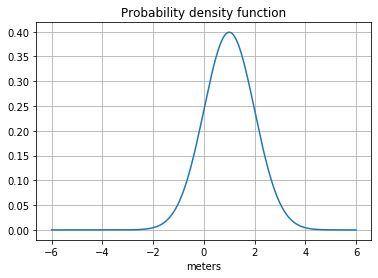

In [9]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

N = 1001 #number of points
a,b = -6,6 #probability domain 

x = np.linspace(a, b, N)
y = st.norm.pdf(x,1,1)

plt.title('Probability density function')
plt.plot(x,y)
plt.xlabel('meters')
plt.grid(True)

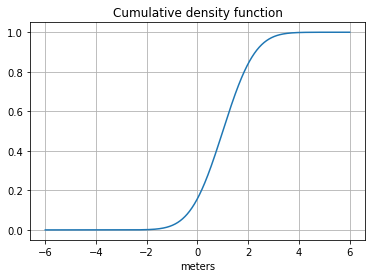

In [10]:
y1 = st.norm.cdf(x,1,1)
plt.title('Cumulative density function')
plt.plot(x,y1)
plt.xlabel('meters')
plt.grid(True)

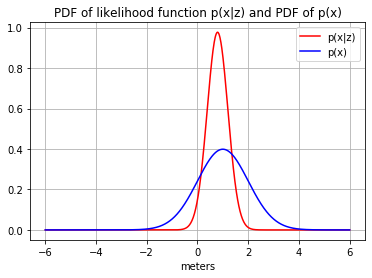

In [11]:
z = 0.75                #Sensor's observation
sigma = 0.2**0.5        #the standard deviation
p_z_x = st.norm.pdf(x,z,sigma) #p(z|x)
p_x = st.norm.pdf(x,1,1)       #p(x)
p_z = 0                 #normalizing constant, further calculated by integration
for i in range(N):
    p_z += p_z_x[i]*p_x[i]*((b-a)/(N-1))
p_x_z = p_z_x*p_x/p_z   #normalized probability density of posterior distribution function p(x|z)

plt.title('PDF of likelihood function p(x|z) and PDF of p(x)')
plt.plot(x,p_x_z,'r', label='p(x|z)')
plt.plot(x,p_x,'b', label='p(x)')
plt.legend()
plt.xlabel('meters')
plt.grid(True)

In [12]:
maximum = p_x_z[0]
index = 0
for i in range(1, N):
    if p_x_z[i] > maximum:
        maximum = p_x_z[i]
        index = i
print('The qualitatively expected value of the posterior distance to the wall E{x|z} = ', x[index], 'meters')

The qualitatively expected value of the posterior distance to the wall E{x|z} =  0.7919999999999998 meters


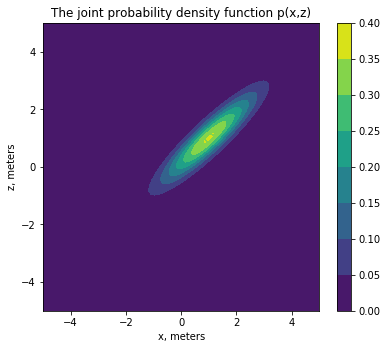

In [18]:
z = np.linspace(-5, 5, 100)
x = np.linspace(-5, 5, 100)
p_x_and_z = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        p_x_and_z[i][j] = st.norm.pdf(x[i],z[j],sigma)*st.norm.pdf(x[i],1,1)   #joint probability density function p(x,z)=p(x)p(z|x)=p(z)p(x|z)

fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 

cp = plt.contourf(x, z, p_x_and_z)
plt.colorbar(cp)

ax.set_title('The joint probability density function p(x,z)')
ax.set_xlabel('x, meters')
ax.set_ylabel('z, meters')
plt.show()